# DRILL: Prepare the Data
## Thinkful Unit 2, Lesson 4

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

crime = pd.read_csv('crime_2013.csv')

In [3]:
crime['Population'] = crime['Population'].str.replace(",", "")
crime['Population'] = crime['Population'].astype(float)
crime['Robbery'] = crime['Robbery'].str.replace(",", "")
crime['Robbery'] = crime['Robbery'].astype(float)

In [4]:
crime['Property crime'] = crime['Property crime'].str.replace(",", "")
crime['Property crime'] = crime['Property crime'].astype(float)
crime['Burglary'] = crime['Burglary'].str.replace(",", "")
crime['Burglary'] = crime['Burglary'].astype(float)
crime['Larceny-theft'] = crime['Larceny-theft'].str.replace(',', '')
crime['Larceny-theft'] = crime['Larceny-theft'].astype(float)

crime['Murder and nonnegligent manslaughter'] = crime['Murder and nonnegligent manslaughter'].astype(float)

In [5]:
crime.rename(columns={'Murder and nonnegligent manslaughter':'Murder'}, inplace=True)

In [6]:
crime['pop_squared'] = crime['Population'].apply(lambda x: np.square(x))

In [7]:
def dummy_func(row):
    if row['Murder'] == 0:
        return 0
    if row['Murder'] > 0:
        return 1

def robbery_dum(row):
    if row['Robbery'] == 0:
        return 0
    if row['Robbery'] > 0:
        return 1

crime['Murder_dum'] = crime.apply(lambda row: dummy_func(row), axis=1)
crime['Robbery_dum'] = crime.apply(lambda row: robbery_dum(row), axis=1)

In [13]:
crime['pc_rate'] = (crime['Property crime']/crime['Population'])
crime['b_rate'] = (crime['Burglary']/crime['Population'])
crime['l_rate'] = (crime['Larceny-theft']/crime['Population'])
crime = crime[['City','Population', 'pop_squared','Violent crime', 
               'Property crime', 'pc_rate', 'Robbery', 'Robbery_dum', 
               'Murder', 'Murder_dum','Burglary', 'b_rate','Larceny-theft', 
               'l_rate','Motor vehicle theft', 'Arson3']]

# Challenge: make your own regression model

Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [37]:
regr = linear_model.LinearRegression()

crime = crime.dropna()

y = crime['pc_rate']
X = crime[['b_rate','l_rate']]
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [1.11992181 1.00703225]

Intercept: 
 2.50311865471059e-05

R-squared:
0.9984109093529432


## Check assumptions.

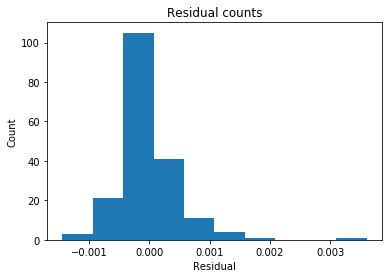

In [38]:
# Extract predicted values.
predicted = regr.predict(X)
actual = crime['pc_rate']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

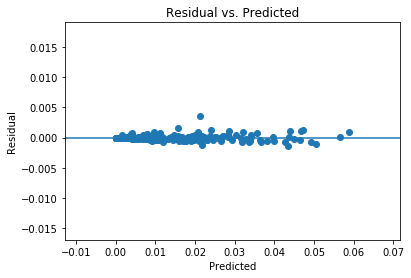

In [39]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [40]:
correlation_matrix = X.corr()
display(correlation_matrix)

,b_rate,l_rate
b_rate,1.000,0.665
l_rate,0.665,1.000


# Challenge: Validating a linear regression
## Validating regression models for prediction

Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

The procedure is the same as what you learned in the Naive Bayes lesson – the holdout method and cross-validation method are both available. You've already had experience writing code to run these kinds of validation models for Naive Bayes: now you can try it again with linear regression. In this case, your goal is to achieve a model with a consistent R2 and only statistically significant parameters across multiple samples.

We'll use the property crime model you've been working on with, based on the FBI:UCR data. Since your model formulation to date has used the entire New York State 2013 dataset, you'll need to validate it using some of the other crime datasets available at the FBI:UCR website. Options include other states crime rates in 2013 or crime rates in New York State in other years or a combination of these.
Iterate

Based on the results of your validation test, create a revised model, and then test both old and new models on a new holdout or set of folds.

Include your model(s) and a brief writeup of the reasoning behind the validation method you chose and the changes you made to submit and review with your mentor.

## In-Sample Testing

In [41]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('With 25% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, y).score(X, y)))


With 25% Holdout: 0.995785589666192
Testing on Sample: 0.9984109093529432


## Test Statistics

In [42]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [32]:
# Use a ~ to represent an '=' from the functional form
linear_formula = 'y ~ b_rate+l_rate'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime).fit()

In [33]:
lm.params

Intercept   0.000
b_rate      1.120
l_rate      1.007
dtype: float64

In [34]:
lm.pvalues

Intercept   0.680
b_rate      0.000
l_rate      0.000
dtype: float64

In [35]:
lm.rsquared

0.9984109093529432

In [36]:
lm.conf_int()

,0,1
Intercept,-0.000,0.000
b_rate,1.084,1.156
l_rate,0.998,1.017
